In [36]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import clear_output
from time import sleep

In [37]:
df1 = pd.read_csv("games_metadata_profile.csv")
df2 = pd.read_csv("games_metadata_profile_2024_01.csv")

df = pd.concat([df1, df2], ignore_index=True)

In [38]:
def format_game_mode(x):
    if "Classical" in x:
        return "Classical game"
    elif "Bullet" in x:
        return "Bullet game"
    elif "Blitz" in x:
        return "Blitz game"
    elif "UltraBullet" in x:
        return "UltraBullet game"
    elif "Rapid" in x:
        return "Rapid game"
    elif "Correspondence" in x:
        return "Correspondence game"
    else:
        return x


df["Mode"] = df["Event"].apply(format_game_mode)

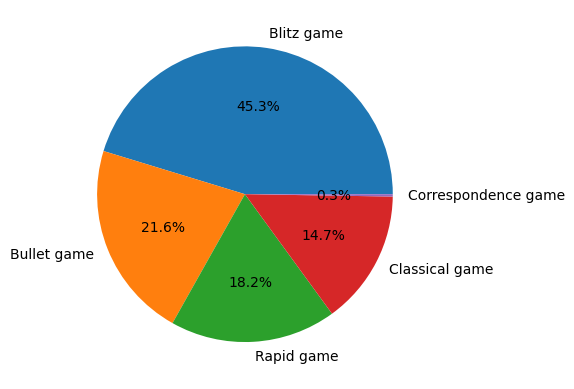

In [4]:
# plot proportion of games by mode
fig, ax = plt.subplots()
df["Mode"].value_counts().plot(kind="pie", autopct="%1.1f%%", ax=ax)
ax.set_ylabel("")
plt.show()

In [6]:
# filter blitz games
df = df[df["Mode"] == "Blitz game"]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93958 entries, 4 to 207478
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                93958 non-null  int64  
 1   Event                 93958 non-null  object 
 2   Site                  93958 non-null  object 
 3   Date                  93958 non-null  object 
 4   Time                  93958 non-null  object 
 5   White                 93958 non-null  object 
 6   WhiteElo              93958 non-null  int64  
 7   WhiteRatingDiff       93450 non-null  float64
 8   White_is_deleted      93958 non-null  bool   
 9   White_tosViolation    30523 non-null  object 
 10  White_profile_flag    28473 non-null  object 
 11  White_createdAt       88066 non-null  float64
 12  White_playTime_total  87967 non-null  float64
 13  White_count_all       88066 non-null  float64
 14  White_title           2402 non-null   object 
 15  Black                 9

<Axes: >

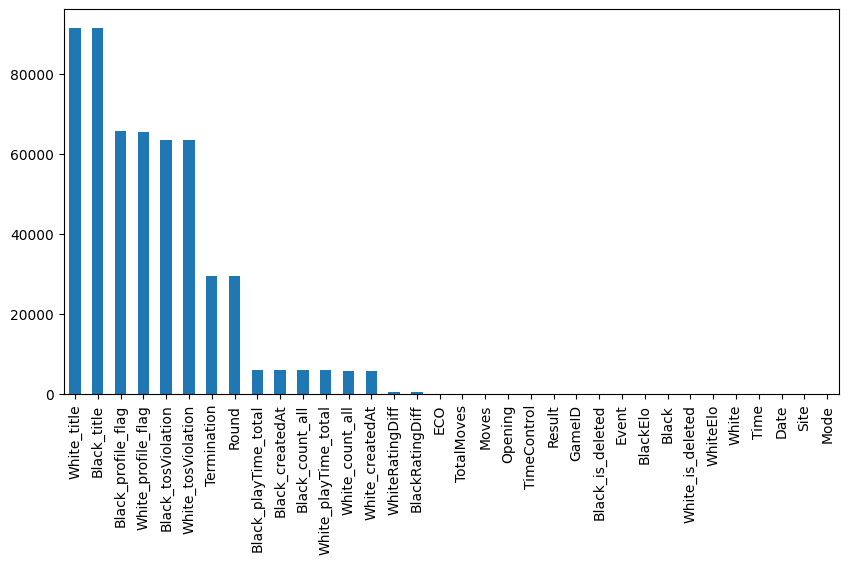

In [6]:
df.isnull().sum().sort_values(ascending=False).plot(kind="bar", figsize=(10, 5))

# Move suggestions


In [7]:
sample_idx = 100

In [8]:
sample_pnq = df.iloc[sample_idx]["Moves"]

sample_pnq

'e4 {[%eval 0.18] [%clk 0:05:00]} e5 {[%eval 0.16] [%clk 0:05:00]} Nf3 {[%eval 0.32] [%clk 0:05:00]} d5 {[%eval 0.79] [%clk 0:05:01]} exd5 {[%eval 0.71] [%clk 0:05:01]} Qxd5 {[%eval 0.89] [%clk 0:05:02]} Nc3 {[%eval 0.82] [%clk 0:05:02]} Qe6 {[%eval 1.22] [%clk 0:04:58]} Be2?! {[%eval 0.66] [%clk 0:05:02]} e4?! {[%eval 1.6] [%clk 0:04:59]} Nd4? {[%eval 0.31] [%clk 0:05:03]} Qe7? {[%eval 2.0] [%clk 0:04:41]} O-O?! {[%eval 1.03] [%clk 0:05:04]} Bh3?? {[%eval 4.6] [%clk 0:04:37]} gxh3 {[%eval 4.51] [%clk 0:05:02]} Qg5+?! {[%eval 5.18] [%clk 0:04:36]} Kh1 {[%eval 5.11] [%clk 0:05:04]} Bd6? {[%eval 6.38] [%clk 0:04:33]} Rg1?? {[%eval 2.14] [%clk 0:05:04]} Qh4?? {[%eval 6.65] [%clk 0:04:32]} Bg4?? {[%eval 2.09] [%clk 0:05:05]} Qxf2 {[%eval 1.87] [%clk 0:04:24]} Rg2? {[%eval 0.3] [%clk 0:05:01]} Qxd4 {[%eval 0.38] [%clk 0:04:21]} d3 {[%eval 0.34] [%clk 0:05:02]} Nf6 {[%eval 0.55] [%clk 0:04:12]} dxe4?! {[%eval -0.36] [%clk 0:05:03]} Nxe4?? {[%eval 14.68] [%clk 0:04:11]} Nxe4?? {[%eval 4.0] [%

In [9]:
import chess
import chess.pgn
from chess.pgn import BaseVisitor
import io


class Visitor(BaseVisitor):
    def __init__(self):
        self.comments = []
        self.moves = []

    def visit_comment(self, comment: str) -> None:
        self.comments.append(comment)

    def visit_move(self, board: chess.Board, move: chess.Move) -> None:
        self.moves.append(move)

    def result(self):
        return self.moves, self.comments


moves, comments = chess.pgn.read_game(io.StringIO(sample_pnq), Visitor=Visitor) 

print(comments)
print(moves)

['[%eval 0.18] [%clk 0:05:00]', '[%eval 0.16] [%clk 0:05:00]', '[%eval 0.32] [%clk 0:05:00]', '[%eval 0.79] [%clk 0:05:01]', '[%eval 0.71] [%clk 0:05:01]', '[%eval 0.89] [%clk 0:05:02]', '[%eval 0.82] [%clk 0:05:02]', '[%eval 1.22] [%clk 0:04:58]', '[%eval 0.66] [%clk 0:05:02]', '[%eval 1.6] [%clk 0:04:59]', '[%eval 0.31] [%clk 0:05:03]', '[%eval 2.0] [%clk 0:04:41]', '[%eval 1.03] [%clk 0:05:04]', '[%eval 4.6] [%clk 0:04:37]', '[%eval 4.51] [%clk 0:05:02]', '[%eval 5.18] [%clk 0:04:36]', '[%eval 5.11] [%clk 0:05:04]', '[%eval 6.38] [%clk 0:04:33]', '[%eval 2.14] [%clk 0:05:04]', '[%eval 6.65] [%clk 0:04:32]', '[%eval 2.09] [%clk 0:05:05]', '[%eval 1.87] [%clk 0:04:24]', '[%eval 0.3] [%clk 0:05:01]', '[%eval 0.38] [%clk 0:04:21]', '[%eval 0.34] [%clk 0:05:02]', '[%eval 0.55] [%clk 0:04:12]', '[%eval -0.36] [%clk 0:05:03]', '[%eval 14.68] [%clk 0:04:11]', '[%eval 4.0] [%clk 0:05:03]', '[%eval 4.17] [%clk 0:04:07]', '[%eval 4.15] [%clk 0:05:02]', '[%eval 6.18] [%clk 0:04:04]', '[%eval 6.

4r1k1/p4p1p/2p3p1/8/8/B6P/PPPR3P/5R1K b - - 0 24


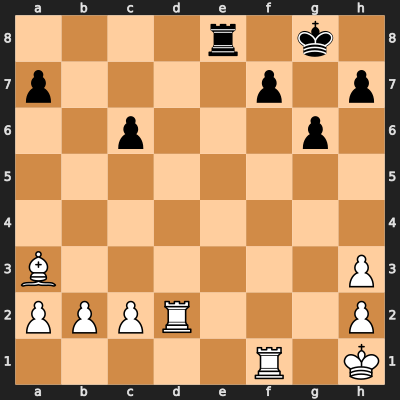

In [10]:
# render board after each move
board = chess.Board()

for move in moves:
    clear_output(wait=True)
    board.push(move)
    print(board.fen())
    display(chess.svg.board(board=board, size=400))
    # sleep(0.2)

In [10]:
from tqdm import tqdm
import pickle


def get_move_dict(game_df: pd.DataFrame, save_path=None):
    if save_path is not None:
        with open(save_path, "rb") as f:
            move_dict = pickle.load(f)
            return move_dict
    else:
        print("No save path provided, generating move dictionary from scratch!")

    move_dict = dict()

    assert "Moves" in game_df.columns, "Moves column not found in DataFrame"
    assert "Result" in game_df.columns, "Result column not found in DataFrame"

    for _, row in tqdm(game_df.iterrows(), total=len(game_df)):
        board = chess.Board()
        moves, _ = chess.pgn.read_game(io.StringIO(row["Moves"]), Visitor=Visitor)
        result = row["Result"]

        for move in moves:
            board_code = " ".join(board.fen().split(" ")[:2])
            move_code = move.uci()

            if board_code not in move_dict:
                move_dict[board_code] = {}

            if move_code not in move_dict[board_code]:
                move_dict[board_code][move_code] = [0, 0, 0]  # count, win, lose

            move_dict[board_code][move_code][0] += 1

            if result == "1-0":
                if board.turn == chess.WHITE:
                    move_dict[board_code][move_code][1] += 1
                else:
                    move_dict[board_code][move_code][2] += 1
            elif result == "0-1":
                if board.turn == chess.BLACK:
                    move_dict[board_code][move_code][1] += 1
                else:
                    move_dict[board_code][move_code][2] += 1
            board.push(move)

    if save_path is not None:
        with open(save_path, "wb") as f:
            pickle.dump(move_dict, f)
    return move_dict

In [12]:
move_dict = get_move_dict(None, load_from="move_dict_1.pkl")

In [11]:
def suggest_move(board: chess.Board, move_dict: dict):
    board_code = " ".join(board.fen().split(" ")[:2])

    if board_code not in move_dict:
        return None  # no data for this board

    ranked_moves = sorted(  # sort by count
        move_dict[board_code].items(), key=lambda x: x[1][0], reverse=True
    )

    for move_code, (count, win, lose) in ranked_moves:
        move = chess.Move.from_uci(move_code)
        if move in board.legal_moves:
            return move, (count, win, lose)

    return None  # no legal move found

In [14]:
# board = chess.Board()

# while not board.is_game_over():
#     move_data = suggest_move(board, move_dict)
#     if move_data is None:
#         print("No move found")
#         break

#     move, (count, win, lose) = move_data
#     board.push(move)
#     clear_output(wait=True)
#     print(f"Move: {move.uci()} Win rate: {win / count:.3f}")
#     display(chess.svg.board(board=board, size=400))
#     sleep(0.7)

# Segment game by player's elo

In [15]:
df[['WhiteElo', 'BlackElo']].describe()

,WhiteElo,BlackElo
count,93958.000000,93958.000000
mean,1641.848634,1642.240746
std,399.752919,399.692949
min,400.000000,400.000000
25%,1365.000000,1364.000000
50%,1631.000000,1632.000000
75%,1909.000000,1910.000000
max,2966.000000,2985.000000


In [26]:
# visualize 33%, 66%, 99% quantiles

quantiles = df[["WhiteElo", "BlackElo"]].quantile([0.33, 0.66, 0.99])

quantiles

,WhiteElo,BlackElo
0.33,1459.0,1458.0
0.66,1801.0,1801.0
0.99,2571.0,2572.0


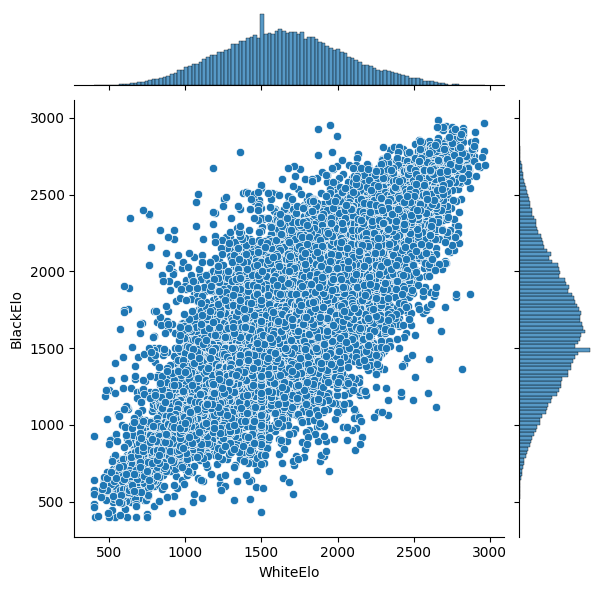

In [16]:
# visualize elo of two players, using jointplot
sns.jointplot(data=df, x="WhiteElo", y="BlackElo")

ax.set_xlabel("White Elo")
ax.set_ylabel("Black Elo")
plt.show()

In [12]:
# x <= 1450: beginner
# 1450 < x <= 1800: intermediate
# x > 1800: advanced


def elo_level(x):
    if x <= 1450:
        return "Beginner"
    elif x <= 1800:
        return "Intermediate"
    else:
        return "Advanced"


df["WhiteEloLevel"] = df["WhiteElo"].apply(elo_level)
df["BlackEloLevel"] = df["BlackElo"].apply(elo_level)

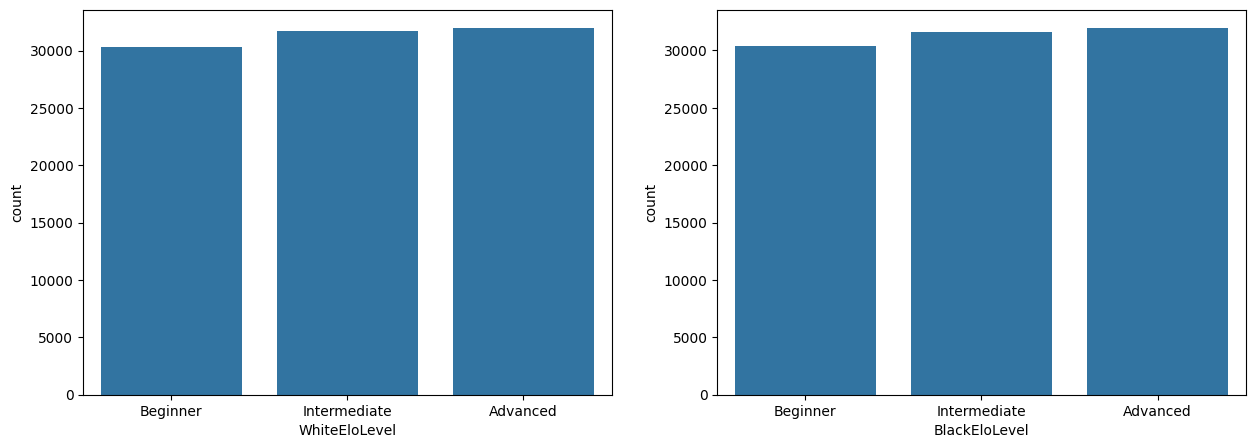

In [16]:
# visualize distribution of game at each elo level

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(
    data=df,
    x="WhiteEloLevel",
    ax=ax[0],
    order=["Beginner", "Intermediate", "Advanced"],
)
sns.countplot(
    data=df,
    x="BlackEloLevel",
    ax=ax[1],
    order=["Beginner", "Intermediate", "Advanced"],
)
plt.show()

In [13]:
game_of_beginner = df[
    (df["WhiteEloLevel"] == "Beginner") & (df["BlackEloLevel"] == "Beginner")
]
game_of_intermediate = df[
    (df["WhiteEloLevel"] == "Intermediate") & (df["BlackEloLevel"] == "Intermediate")
]
game_of_advanced = df[
    (df["WhiteEloLevel"] == "Advanced") & (df["BlackEloLevel"] == "Advanced")
]

print("Beginner games:", len(game_of_beginner))
print("Intermediate games:", len(game_of_intermediate))
print("Advanced games:", len(game_of_advanced))

Beginner games: 27011
Intermediate games: 25261
Advanced games: 28114


## Generate move dictionary by player's level

In [14]:
move_dict_bgn = get_move_dict(
    game_of_beginner,
    save_path="move_dict_beginner.pkl",
)

move_dict_itm = get_move_dict(
    game_of_intermediate,
    save_path="move_dict_intermediate.pkl",
)

move_dict_adv = get_move_dict(game_of_advanced, save_path="move_dict_advanced.pkl")

100%|██████████| 28114/28114 [01:52<00:00, 249.14it/s]


In [33]:
def play_game(
    board: chess.Board, black_policy: dict, white_policy: dict, visualize=False
):
    num_moves = 0
    while not board.is_game_over():
        if board.turn == chess.WHITE:
            move_data = suggest_move(board, white_policy)
        else:
            move_data = suggest_move(board, black_policy)

        if move_data is None:
            print("No move found")
            break

        move, _ = move_data
        board.push(move)
        num_moves += 1
        if visualize:
            clear_output(wait=True)
            print(f"Move {num_moves}")
            display(chess.svg.board(board=board, size=300))
            sleep(0.5)

    return board.result()

Move 88


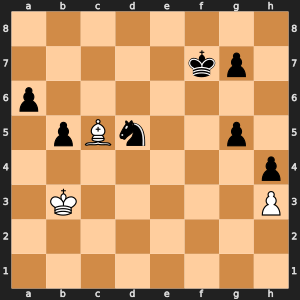

No move found


'*'

In [39]:
play_game(chess.Board(), move_dict_itm, move_dict_itm, visualize=True)

## Summary

**Target**:
At each level of player, generate a dictionary of moves(a policy) that are most likely to be played by the player at a given board.
Policy of higher level player should be more proficient than lower level player.

- Input: A list of games with player's elo.
- Output: A dictionary of moves for each level of player.

**Problem**: Some board settings are not exist in the dataset, resulting in missing moves in the dictionary, cannot find the next move for the player.

**Idea**:

- Represent the board by a list of important features, not the exact whole board setting ==> Reduce the number of possible board settings. e.g. nearly similar boards may have the same representation.

- Learning a function to predict the next move based on the board representation. The board may not exactly exist in the dataset.
